# Merge Sort

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/mergesort.ipynb)

## Implementing Merge Sort

[Merge sort](https://en.wikipedia.org/wiki/Merge_sort) is a divide and conquer strategy:

1. Divide the sequence into two halves,

2. Sort the halves, and

3. Merge the sorted sub-sequences into a single sequence.

Since step 2 involves sorting, this algorithm is recursive, so we need a base case.
There are two options:

1. If the size falls below some threshold, we can use another sort algorithm.

2. If the size of a sub-sequence is 1, it is already sorted.

[Comparison with other sort algorithms](https://en.wikipedia.org/wiki/Merge_sort#Comparison_with_other_sort_algorithms)

To implement merge sort, I think it's helpful to start with a non-recursive version that uses the Python `sort` function to sort the sub-sequences.

In [ ]:
def merge_sort_norec(xs):
    n = len(xs)
    mid = n//2
    left = xs[:mid]
    right = xs[mid:]

    left.sort()
    right.sort()

    return merge(left, right)

**Exercise:** Write a function called `merge` that takes two sorted sequences, `left` and `right`, and returns a sequence that contains all elements from `left` and `right`, in ascending order (or non-decreasing order, to be more precise).

Note: this function is not conceptually difficult, but it is notoriously tricky to get all of the edge cases right without making the function unreadable.
Take it as a challenge to write a version that is correct, concise, and readable.
I found that I could write it more concisely as a generator function.

In [1]:
def merge(left, right):
  def merge_helper(left, right):
    l = next(left, None)
    r = next(right, None)
    while l is not None and r is not None:
      if l < r:
        yield l
        l = next(left, None)
      else:
        yield r
        r = next(right, None)
    while l is not None:
      yield l
      l = next(left, None)
    while r is not None:
      yield r
      r = next(right, None)
  return list(merge_helper(iter(left), iter(right)))

You can use the following example to test your code.

In [2]:
import random

population = range(100)
xs = random.sample(population, k=6)
ys = random.sample(population, k=6)
ys

[73, 15, 35, 4, 89, 53]

In [3]:
xs.sort()
ys.sort()
ys

[4, 15, 35, 53, 73, 89]

In [4]:
res = list(merge(xs, ys))
res

[4, 15, 18, 21, 35, 47, 53, 56, 57, 73, 84, 89]

In [5]:
sorted(res) == res

True

**Exercise:**  Starting with `merge_sort_norec`, write a function called `merge_sort_rec` that's fully recursive; that is, instead of using Python's `sort` function to sort the halves, it should use `merge_sort_rec`.  Of course, you will need a base case to avoid an infinite recursion.



In [6]:
def merge_sort_rec(xs):
    if len(xs) <= 1:
        return xs
    n = len(xs)
    mid = n//2
    left = xs[:mid]
    right = xs[mid:]

    left = merge_sort_rec(left)
    right = merge_sort_rec(right)

    return merge(left, right)

Test your method by running the code in the next cell, then use `test_merge_sort_rec`, below, to check the performance of your function.

In [7]:
xs = random.sample(population, k=12)
xs

[7, 77, 73, 76, 30, 58, 45, 43, 61, 9, 78, 96]

In [8]:
res = list(merge_sort_rec(xs))
res

[7, 9, 30, 43, 45, 58, 61, 73, 76, 77, 78, 96]

In [9]:
sorted(res) == res

True

## Heap Merge

Suppose we want to merge more than two sub-sequences.
A convenient way to do that is to use a heap.
For example, here are three sorted sub-sequences.

In [10]:
xs = random.sample(population, k=5)
ys = random.sample(population, k=5)
zs = random.sample(population, k=5)

min(xs), min(ys), min(zs)

(18, 33, 13)

In [11]:
xs.sort()
ys.sort()
zs.sort()

For each sequence, I'll make an iterator and push onto the heap a tuple that contains:

* The first element from the iterator,

* An index that's different for each iterator, and

* The iterator itself.

When the heap compares two of these tuples, it compares the elements first.
If there's a tie, it compares the indices.
Since the indices are unique, there can't be a tie, so we never have to compare iterators (which would be an error).

In [12]:
sequences = [xs, ys, zs]

In [13]:
from heapq import heappush, heappop

heap = []
for i, seq in enumerate(sequences):
    iterator = iter(seq)
    first = next(iterator)
    heappush(heap, (first, i, iterator))

When we pop a value from the heap, we get the tuple with the smallest value.

In [ ]:
value, i, iterator = heappop(heap)
value

If we know that the iterator has more values, we can use `next` to get the next one and then push a tuple back into the heap.

In [14]:
heappush(heap, (next(iterator), i, iterator))

If we repeat this process, we'll get all elements from all sub-sequences in ascending order.

However, we have to deal with the case where the iterator is empty.
In Python, the only way to check is to call `next` and take your chances!
If there are no more elements in the iterator, `next` raises a `StopIteration` exception, which you can handle with a `try` statement, like this:

In [15]:
iterator = iter(xs)

while True:
    try:
        print(next(iterator))
    except StopIteration:
        break

18
26
61
67
78


**Exercise:** Write a generator function called `heapmerge` that takes a list of sequences and yields the elements from the sequences in increasing order.

In [17]:
def heapmerge(seqs):
  heap = []
  for i, seq in enumerate(sequences):
      iterator = iter(seq)
      first = next(iterator)
      heappush(heap, (first, i, iterator))
  while heap:
    value, i, iterator = heappop(heap)
    yield value
    try:
      heappush(heap, (next(iterator), i, iterator))
    except StopIteration:
      pass

You can use the following examples to test your function.

In [18]:
seq = list(heapmerge([xs, ys, zs]))
seq

[13, 18, 26, 33, 35, 51, 61, 67, 67, 69, 72, 78, 80, 82, 93]

In [19]:
sorted(seq) == seq

True

The `heapq` module provides a function called `merge` that implements this algorithm.

## Comparing sort algorithms

NumPy provides implementations of three sorting algorithms, quicksort, mergesort, and heapsort.

In theory that are all in `O(n log n)`.
Let's see what that looks like when we plot runtime versus problem size.


In [20]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

Downloaded timing.py


In [21]:
from timing import run_timing_test, plot_timing_test

1024 0.009999999999999787
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.009999999999999787
131072 0.009999999999999787
262144 0.020000000000000462
524288 0.040000000000000036
1048576 0.07999999999999918
2097152 0.17000000000000082
4194304 0.33000000000000007
8388608 0.6699999999999999
16777216 0.8800000000000008
33554432 1.8100000000000005


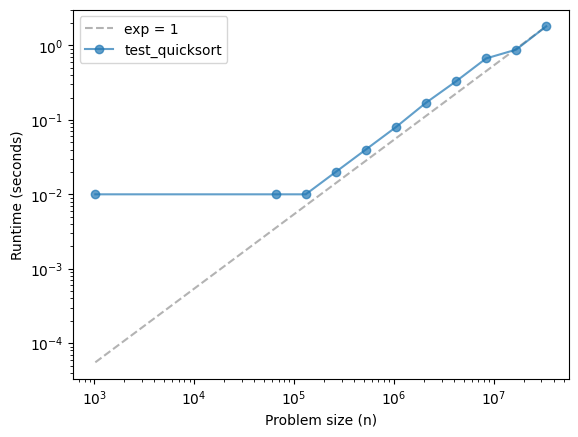

In [22]:
import numpy as np

def test_quicksort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='quicksort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_quicksort', exp=1)

quicksort is hard to distinguish from linear, up to about 10 million elements.

1024 0.009999999999999787
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.009999999999999787
131072 0.019999999999999574
262144 0.040000000000000924
524288 0.08000000000000007
1048576 0.1899999999999995
2097152 0.3699999999999992
4194304 0.7699999999999996
8388608 1.6400000000000023


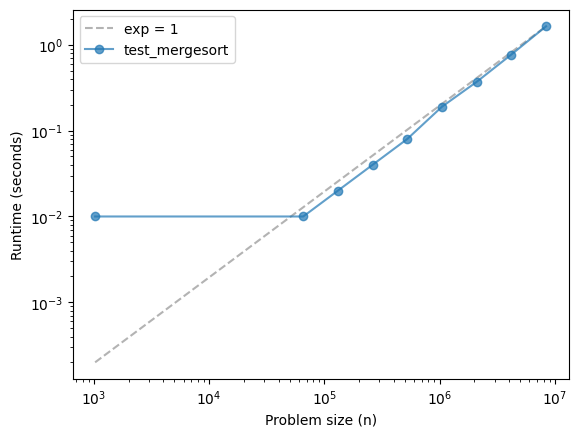

In [23]:
def test_mergesort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='mergesort')

ns, ts = run_timing_test(test_mergesort)
plot_timing_test(ns, ts, 'test_mergesort', exp=1)

Merge sort is similar, maybe with some upward curvature.

1024 0.0
2048 0.0
4096 0.0
8192 0.010000000000001563
16384 0.0
32768 0.0
65536 0.0
131072 0.00999999999999801
262144 0.010000000000001563
524288 0.019999999999999574
1048576 0.05000000000000071
2097152 0.10000000000000142
4194304 0.1999999999999993
8388608 0.43000000000000327
16777216 0.879999999999999
33554432 1.7900000000000027


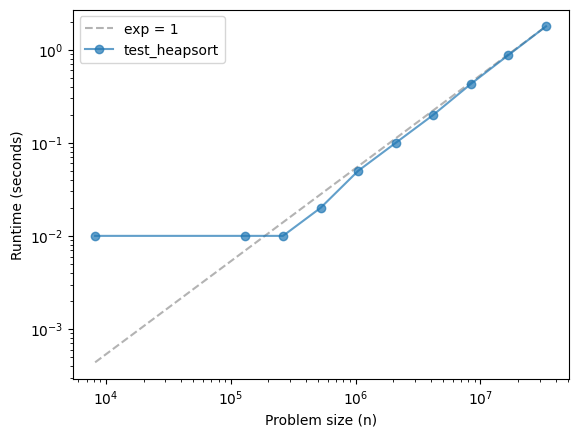

In [24]:
def test_heapsort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='heapsort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_heapsort', exp=1)

The three methods are effectively linear over this range of problem sizes.

And their run times are about the same, with quicksort being the fastest, despite being the one with the worst asympotic performance in the worst case.

Now let's see how our implementation of merge sort does.

1024 0.00999999999999801
2048 0.0
4096 0.019999999999999574
8192 0.030000000000001137
16384 0.07000000000000028
32768 0.129999999999999
65536 0.26000000000000156
131072 0.5499999999999972
262144 1.1800000000000033


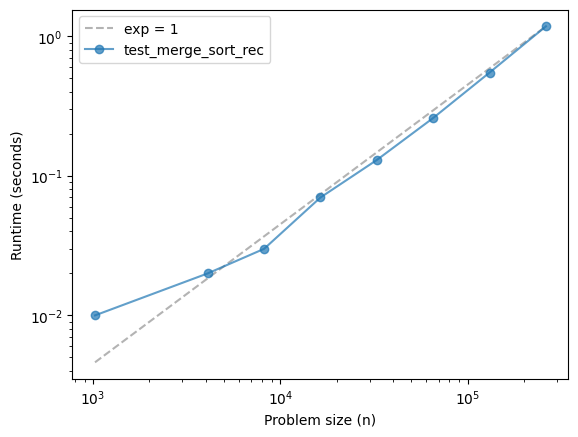

In [25]:
def test_merge_sort_rec(n):
    xs = np.random.normal(size=n)
    spectrum = merge_sort_rec(xs)

ns, ts = run_timing_test(test_merge_sort_rec)
plot_timing_test(ns, ts, 'test_merge_sort_rec', exp=1)

If things go according to plan, our implementation of merge sort should be close to linear, or a little steeper.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)